# **Upwork Jobs Analysis**

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Data Overview:**

### Overview of Dataset

In [97]:
df = pd.read_csv('upwork-jobs.csv')
df.head()

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,Join Our Growing Team!We are an innovative com...,2024-02-17 09:08:08+00:00,NaN,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


### Overlooking null values in dataset

In [98]:
df.isnull().sum()

title                 0
link                  0
description           0
published_date        0
is_hourly          8229
hourly_low        30102
hourly_high       30897
budget            31185
country            1141
dtype: int64

### Looking for the count of rows and columns

In [99]:
df.shape

(53058, 9)

## **2. Trends and Patterns:**

### How does the distribution of published dates look like? Are there any noticeable trends or patterns over time?

In [100]:
df['published_date'] = pd.to_datetime(df['published_date'])

df['published_date_only'] = df['published_date'].dt.date

df['published_time'] = df['published_date'].dt.time

df['published_date_only'] = pd.to_datetime(df['published_date_only'])

In [101]:
df.head()

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country,published_date_only,published_time
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN,2024-02-17,09:09:54
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States,2024-02-17,09:09:17
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States,2024-02-17,09:08:46
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,Join Our Growing Team!We are an innovative com...,2024-02-17 09:08:08+00:00,NaN,NaN,NaN,NaN,United States,2024-02-17,09:08:08
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India,2024-02-17,09:07:42


In [102]:
pd.DataFrame(df.groupby('published_date_only')['title'].count())

,title
published_date_only,
2023-12-02,1
2023-12-05,1
2023-12-13,1
2023-12-16,1
2023-12-20,1
2023-12-21,1
2023-12-25,1
2024-01-02,2
2024-01-03,1


In [103]:
start_date = '2023-01-01'
end_date = '2023-12-31'
data_year_23 = df[(df['published_date_only'] >= start_date) & (df['published_date_only'] <= end_date)]

start_date = '2024-01-01'
end_date = '2024-12-31'
data_year_24 = df[(df['published_date_only'] >= start_date) & (df['published_date_only'] <= end_date)]

In [104]:
total_records_in_23 = pd.DataFrame(data_year_23.groupby('published_date_only')['title'].count()).shape[0]
total_records_in_24 = pd.DataFrame(data_year_24.groupby('published_date_only')['title'].count())['title'].sum()

In [105]:
print('Total records in 2023 are ',total_records_in_23)
print('Total records in 2024 are ',total_records_in_24)

Total records in 2023 are  7
Total records in 2024 are  53051


### Most Popular Coutries

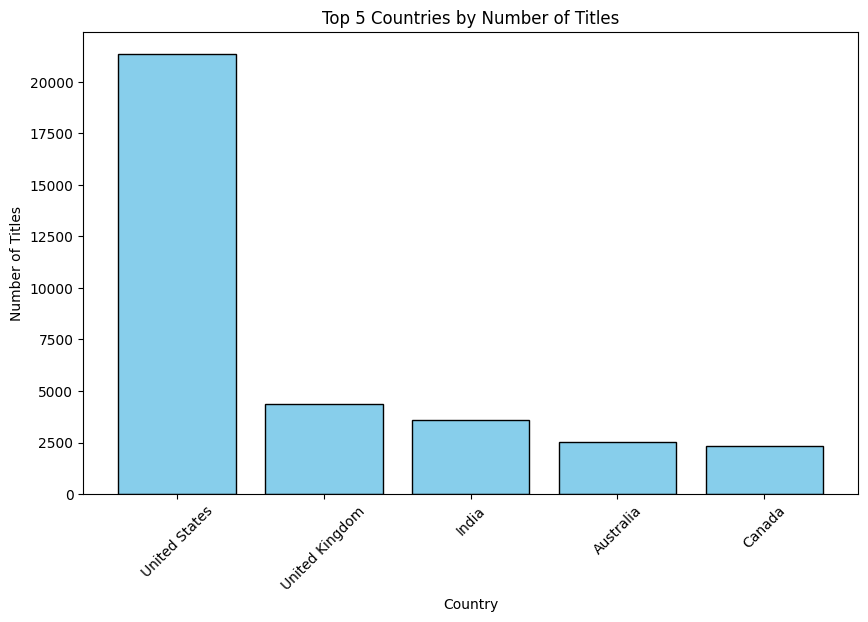

In [106]:
country_counts = df.groupby('country')['title'].count().sort_values(ascending=False)

top_countries = pd.DataFrame(country_counts).head()

plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries['title'], color='skyblue', edgecolor='black')
plt.title('Top 5 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

## **3. Hourly Rates:**

### What is the average hourly rate across all entries?

In [107]:
hourly = df[df['is_hourly'] == True]
avg_budget = round(((hourly['hourly_low'].sum() + hourly['hourly_high'].sum() + hourly['budget'].sum()) / len(df)) * 100, 2)
print('Average budget is ',avg_budget)

Average budget is  2493.63


### Are there any outliers in terms of hourly rates? If so, handle it

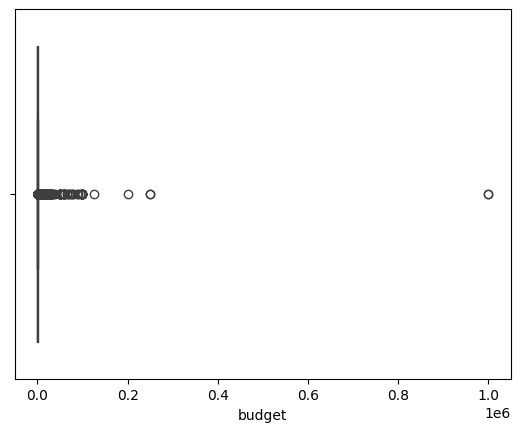

In [108]:
sns.boxplot(df['budget'],orient='y')
plt.show()

#### Checking **Distribution**

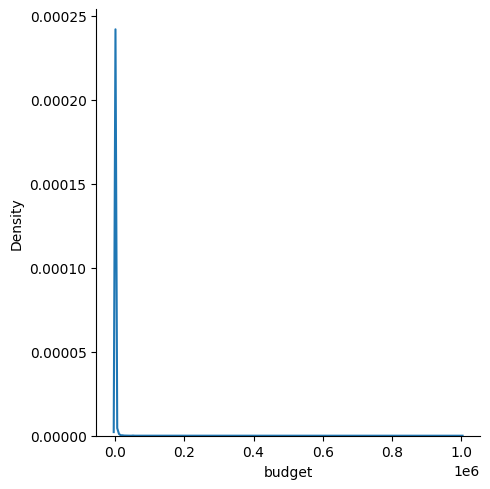

In [109]:
sns.displot(df['budget'],kind='kde')
plt.show()

In [110]:
Q3 = df['budget'].quantile(0.75)
Q1 = df['budget'].quantile(0.25)
IQR = Q3 - Q1

In [111]:
minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)

#### **Capping**

In [112]:
df['budget'] = np.where(
    df['budget'] < minimum, 
    minimum, 
    np.where(df['budget'] > maximum, 
            maximum,
            df['budget'])
)

### Can we identify any trends in hourly rates over time or across different countries?

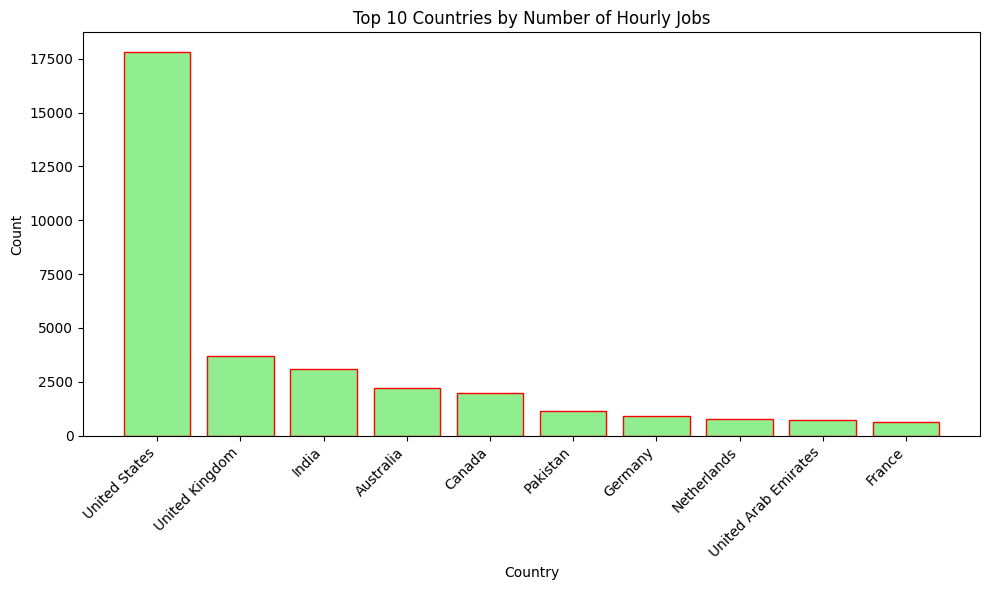

In [113]:
top_10_countries = df.groupby('country')['is_hourly'].count().sort_values(ascending=False).head(10)

df_plot = pd.DataFrame(top_10_countries)

plt.figure(figsize=(10, 6))
plt.bar(df_plot.index, df_plot['is_hourly'], color='lightgreen', edgecolor='red')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Number of Hourly Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **4. Budget Allocation:**

### How are budgets distributed across different entries?

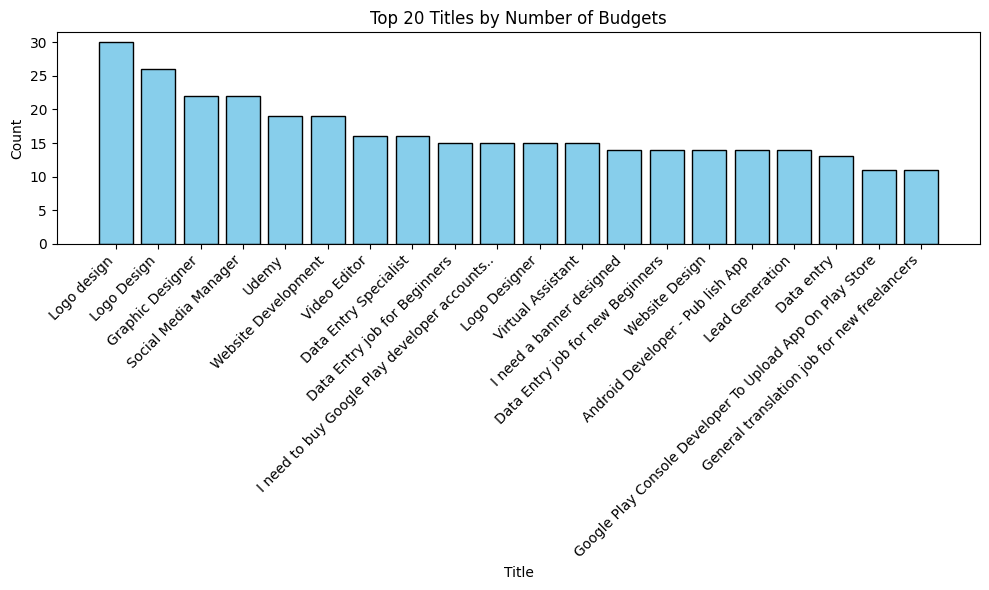

In [114]:
top_20_titles = df.groupby('title')['budget'].count().sort_values(ascending=False).head(20)

df_plot = pd.DataFrame(top_20_titles)

plt.figure(figsize=(10, 6))
plt.bar(df_plot.index, df_plot['budget'], color='skyblue', edgecolor='black')
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Top 20 Titles by Number of Budgets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Can we identify any patterns in budget allocation based on the type of work or country?

In [115]:
pd.DataFrame(df.groupby('country')['budget'].mean().sort_values(ascending=False)).head()

,budget
country,
Aland Islands,705.0
Belarus,705.0
United States Virgin Islands,705.0
Myanmar,705.0
Mongolia,627.5


## **5. Geographical Analysis:**

### Which countries have the highest number of entries in the dataset?

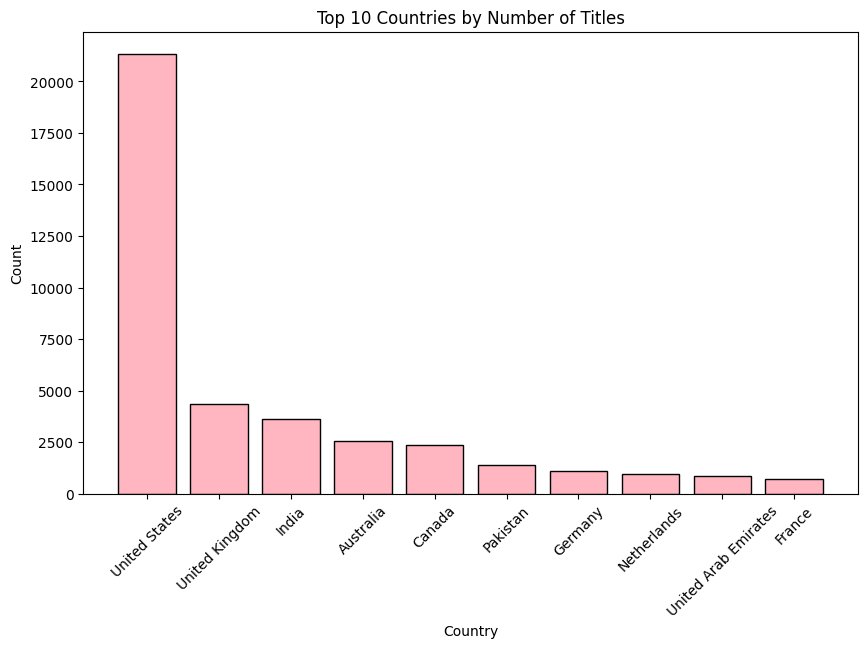

In [116]:
top_10_countries = df.groupby('country')['title'].count().sort_values(ascending=False).head(10)

df_plot = pd.DataFrame(top_10_countries)

plt.figure(figsize=(10, 6))
plt.bar(df_plot.index, df_plot['title'], color='lightpink', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Number of Titles')
plt.xticks(rotation=45)
plt.show()

## **6. Predictive Modeling:**

In [117]:
df.head(1)

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country,published_date_only,published_time
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN,2024-02-17,09:09:54


In [143]:
df['budget'] = df['budget'].fillna(df['budget'].mean())

In [144]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['link','description','published_date','budget','published_time','published_date_only'])
y = df['budget']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [145]:
X

,title,is_hourly,hourly_low,hourly_high,country
0,Experienced Media Buyer For Solar Pannel and R...,False,NaN,NaN,NaN
1,Full Stack Developer,False,NaN,NaN,United States
2,SMMA Bubble App,True,10.0,30.0,United States
3,Talent Hunter Specialized in Marketing,NaN,NaN,NaN,United States
4,Data Engineer,False,NaN,NaN,India
...,...,...,...,...,...
53053,Partial Migration From WordPress to Shopify,False,NaN,NaN,Australia
53054,Logo work &amp; Event Booth Rendering,False,NaN,NaN,United States
53055,Wedding Dress Collection Photographer,True,23.0,51.0,Australia
53056,Design a startup profile,False,NaN,NaN,Saudi Arabia


In [146]:
X.isnull().sum()

title              0
is_hourly       8229
hourly_low     30102
hourly_high    30897
country         1141
dtype: int64

In [147]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42446 entries, 36294 to 3802
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        42446 non-null  object 
 1   is_hourly    35871 non-null  object 
 2   hourly_low   18339 non-null  float64
 3   hourly_high  17710 non-null  float64
 4   country      41531 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.9+ MB


In [148]:
numerical_columns = [2,3]
cat_nominal = [0,4]
cat_ordinal = [1]

In [149]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [150]:
handle_numerical = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean'))
])

In [151]:
handle_cat_nominal = Pipeline(steps=[
    ('impute_nominal',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

In [152]:
handle_cat_ordinal = Pipeline(steps=[
    ('impute_ordinal',SimpleImputer(strategy='most_frequent')),
    ('encode',OrdinalEncoder())
])

In [153]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical',handle_numerical,numerical_columns),
    ('cat_ordinal',handle_cat_ordinal,cat_ordinal),
    ('cat_nominal',handle_cat_nominal,cat_nominal)
],remainder='passthrough')

In [154]:
model = LinearRegression()

In [155]:
pipe = make_pipeline(preprocessing,model)

In [156]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  [2, 3]),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('impute_ordinal',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  [1]),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('impute_nominal',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [0, 4])])),
                ('linearregression', LinearRegression())])

In [157]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training R^2 score:", train_r2)
print("Testing R^2 score:", test_r2)

Training RMSE: 38.10117220983802
Testing RMSE: 153.65213305612576
Training R^2 score: 0.9394412659884304
Testing R^2 score: -0.05422134144250079


c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
